In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('flux_516', sep='\s+')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_21955/440990232.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('flux_516', sep='\s+')


,energy,flux,relative
0,1.0000E-11,2.615700e-12,1.0000
1,3.0900E-10,7.506350e-09,0.0793
2,3.9700E-10,6.285860e-09,0.0902
3,5.1000E-10,1.297210e-08,0.1198
4,6.5400E-10,2.295720e-08,0.0698


In [42]:
# Visualiza as linhas 728 a 828 como tabela usando pandas
with open('cronos_ssw3_loki_5b_cont.o', 'r') as f:
    lines = f.readlines()
dados = [line.strip().split() for line in lines[724:828]] 
df1 = pd.DataFrame(dados) 
df1

,0,1,2
0,energy,None,None
1,1.0000E-11,0.00000E+00,0.0000
2,3.0900E-10,8.85123E-10,0.2026
3,3.9700E-10,1.33060E-09,0.3343
4,5.1000E-10,1.67982E-09,0.1681
...,...,...,...
99,1.0500E+01,5.72998E-09,0.0474
100,1.3500E+01,6.83837E-10,0.1052
101,1.7300E+01,3.00145E-11,0.8742
102,2.0000E+01,0.00000E+00,0.0000


In [47]:
# define colunas e remove a primeira e a última linha
df1.columns = ['energy', 'flux', 'error']
df1 = df1.iloc[1:-1]
# convertendo os dados da colunas para float
df1 = df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  102 non-null    float64
 1   flux    102 non-null    float64
 2   error   102 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


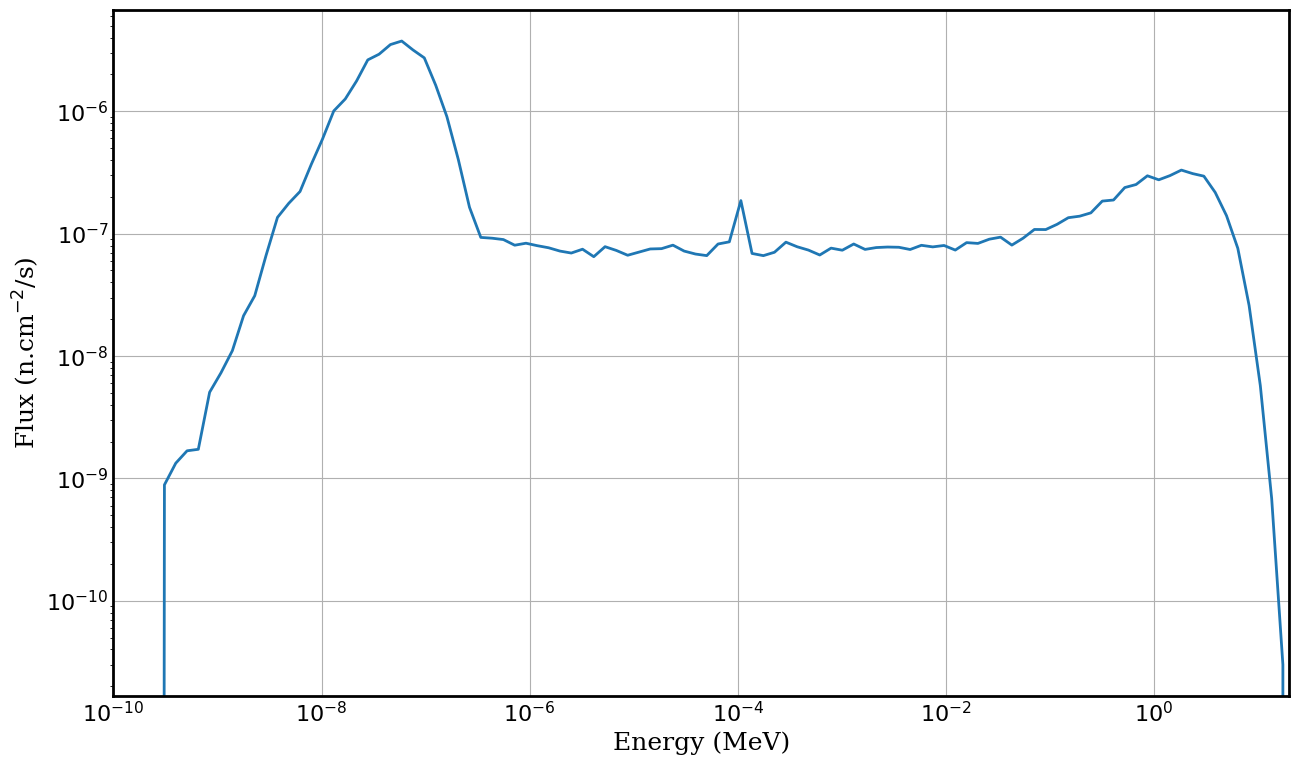

In [61]:
# plot do fluxo superficie 516 
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(12, 7))
ax.plot(df1["energy"], df1['flux'], linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.set_xlim(1e-10, 20)
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

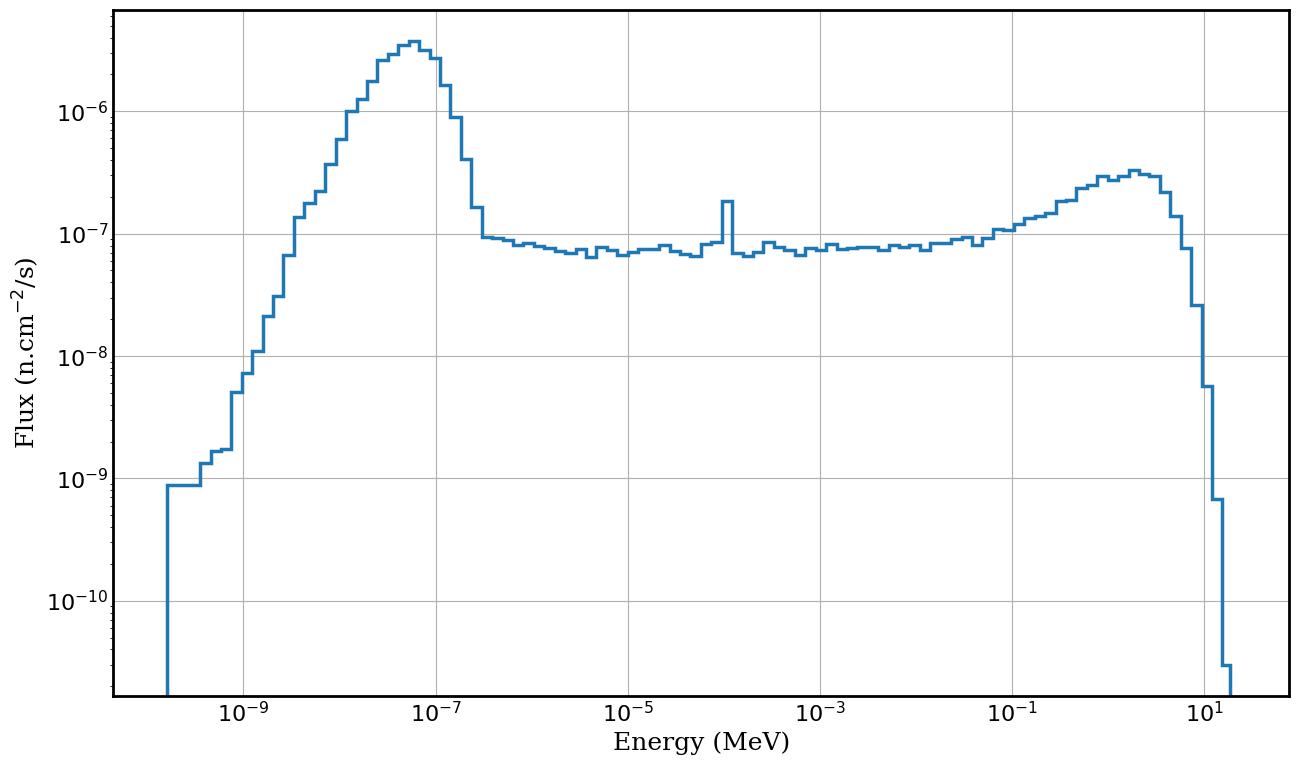

In [63]:
import numpy as np

energy = df1['energy'].to_numpy()
flux = df1['flux'].to_numpy()

# Calcula edges assumindo que energy são centros dos bins
edges = np.zeros(len(energy) + 1)
edges[1:-1] = (energy[:-1] + energy[1:]) / 2
edges[0] = energy[0] - (energy[1] - energy[0]) / 2
edges[-1] = energy[-1] + (energy[-1] - energy[-2]) / 2

fig, ax = plt.subplots(figsize=(12, 7))
ax.stairs(flux, edges, linewidth=2.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)', fontsize=18, fontfamily='serif')
ax.set_ylabel('Flux (n.cm$^{-2}$/s)', fontsize=18, fontfamily='serif')
ax.tick_params(axis='both', which='major', labelsize=16, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
plt.show()

In [64]:
edges

array([-1.3950e-10,  1.5950e-10,  3.5300e-10,  4.5350e-10,  5.8200e-10,
        7.4700e-10,  9.6000e-10,  1.2350e-09,  1.5850e-09,  2.0300e-09,
        2.6050e-09,  3.3500e-09,  4.3050e-09,  5.5250e-09,  7.0900e-09,
        9.0850e-09,  1.1650e-08,  1.5000e-08,  1.9300e-08,  2.4750e-08,
        3.1750e-08,  4.0800e-08,  5.2400e-08,  6.7250e-08,  8.6350e-08,
        1.1105e-07,  1.4250e-07,  1.8300e-07,  2.3500e-07,  3.0150e-07,
        3.8700e-07,  4.9700e-07,  6.3850e-07,  8.1950e-07,  1.0505e-06,
        1.3500e-06,  1.7350e-06,  2.2300e-06,  2.8650e-06,  3.6750e-06,
        4.7150e-06,  6.0550e-06,  7.7750e-06,  9.9700e-06,  1.2800e-05,
        1.6450e-05,  2.1150e-05,  2.7150e-05,  3.4850e-05,  4.4750e-05,
        5.7450e-05,  7.3750e-05,  9.4950e-05,  1.2200e-04,  1.5650e-04,
        2.0050e-04,  2.5750e-04,  3.3100e-04,  4.2450e-04,  5.4500e-04,
        7.0000e-04,  8.9850e-04,  1.1550e-03,  1.4850e-03,  1.9050e-03,
        2.4450e-03,  3.1400e-03,  4.0300e-03,  5.1700e-03,  6.64